<a href="https://colab.research.google.com/github/ArwaAsiri/Affaq/blob/main/Lab%20Quiz%20Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

## **Data**

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.09MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.59MB/s]


## **Sample Image**

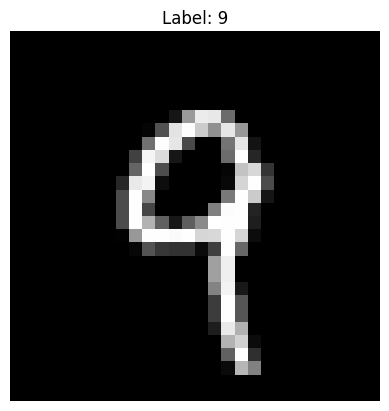

In [14]:
for images, labels in trainloader:
    break

plt.imshow(images[0].squeeze(), cmap='gray')
plt.axis('off')
plt.title(f"Label: {labels[0].item()}")
plt.show()

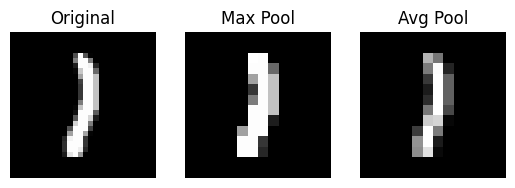

In [5]:
img = images[0] # (1, 28, 28)

max_pooled = F.max_pool2d(img, kernel_size=2)
avg_pooled = F.avg_pool2d(img, kernel_size=2)

plt.subplot(1, 3, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(max_pooled.squeeze(), cmap='gray')
plt.title('Max Pool')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(avg_pooled.squeeze(), cmap='gray')
plt.title('Avg Pool')
plt.axis('off')

plt.show()

In [6]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1, 8, 3) # (3, 3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(2) # (2, 2) stride = 2
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(1352, 10) # 8 * 13 * 13

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

model = CNN()
model(torch.Tensor(1, 1, 28, 28)).shape

torch.Size([1, 10])

In [7]:
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs=5

for epoch in range(epochs):

    for imgs, labels in trainloader:

        preds = model(imgs)

        loss = loss_fn(preds, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()



In [8]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for imgs, labels in testloader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy:", round(100 * correct / total, 2), "%")

Accuracy: 97.67 %


## **Bonus Task:**
Link the model to an interactive streamlit app :)

In [9]:
torch.save(model.state_dict(), 'mnist_model.pth')
